# lire le fichier FINKE_PROJET4

In [1]:
!pip install Numpy==1.23.5

In [2]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto
import datetime as dt
from scipy.stats import chi2_contingency
import math
from scipy.stats import lognorm
#import statsmodels.api as sm


C:\Users\FINKE epse TAKOU\.conda\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
#Importation du fichier ptc.csv
customers = pd.read_csv('FINKE_PROJET4.csv', delimiter = ",")

In [4]:
customers

,Unnamed: 0,id_prod,date,session_id,client_id,price,categ,sex,birth,day
0,0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05-20
1,1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,2022-02-02
2,2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968,2022-06-18
3,3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,2021-06-24
4,4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,2023-01-11
...,...,...,...,...,...,...,...,...,...,...
679327,679401,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951,2022-01-15
679328,679402,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977,2022-03-19
679329,679403,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988,2022-12-20
679330,679404,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986,2021-07-16


In [5]:
del customers['Unnamed: 0']

In [6]:
customers.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,day
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05-20
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,2022-02-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968,2022-06-18
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,2021-06-24
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,2023-01-11


In [7]:
# table de contingence

#cos_crosstab = customers.crosstab(customers['sex'],
                            #customers['birth'], 
                              # margins = False)
#print(cos_crosstab)

# chiffred'affaire

# chiffre d'affaire pour les clients

In [8]:
#calcul du chiffre d'affaire de chaques clients
client=customers.groupby(['client_id'])['price'].sum()
client
client.sort_values( ascending=False)

client_id
c_1609    324033.350000
c_4958    289760.340000
c_6714    153703.648641
c_3454    113690.294320
c_3263      5276.870000
              ...      
c_4648        11.200000
c_240         11.060000
c_8114         9.980000
c_8140         8.300000
c_8351         6.310000
Name: price, Length: 8600, dtype: float64

<AxesSubplot:xlabel='birth'>

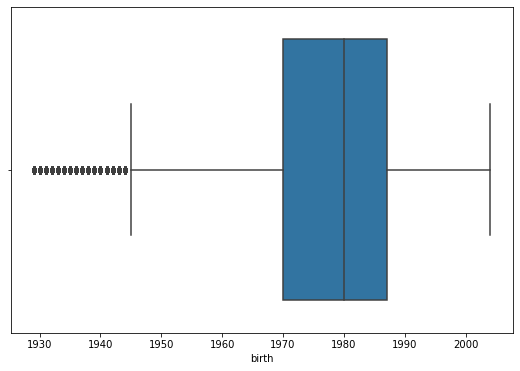

In [9]:
#profil des clients
plt.figure(figsize=(9,6))
sns.boxplot(x= 'birth', data= customers)

# Gerer les outlier

In [10]:
customers.groupby(['client_id'])['price'].sum().describe()

count      8600.000000
mean       1378.789091
std        5183.098618
min           6.310000
25%         547.885000
50%        1027.645000
75%        1779.785000
max      324033.350000
Name: price, dtype: float64

In [11]:
#Calculons les quartiles
D = (customers.groupby(['client_id'])['price'].sum().quantile(q=[0.25, 0.5, 0.75]))
Q1 = D[0.25]
Q2 = D[0.5]
Q3 = D[0.75]
IQR= Q3-Q1
print("Le premier quartile Q1 = ", Q1)
print("La mediane Q2 = ", Q2)
print("Le troisieme quartile Q3 = ", Q3)
IQR

Le premier quartile Q1 =  547.8850000000001
La mediane Q2 =  1027.6450000000002
Le troisieme quartile Q3 =  1779.785


1231.9

In [12]:
L = list(customers.groupby(['client_id'])['price'].sum())
IQR = Q3 - Q1
outlier = []
for item in L :
    if item<(Q1 - 1.5*IQR) or item>(Q3 + 1.5*IQR):
        outlier.append(item)
        
print("Les outliers de cette distribution est : ", outlier)
print("Le nombre de outliers de cette distribution est : ", len(outlier))

Les outliers de cette distribution est :  [3982.009999999986, 3767.7790939629017, 4152.269999999983, 4156.409999999983, 4244.039999999996, 3697.6899999999873, 4225.629999999996, 4096.684773490711, 3714.4999999999864, 4069.199999999983, 4359.919999999982, 3673.50999999999, 4022.249999999986, 4598.8499999999785, 4993.5499999999765, 3942.189999999983, 4130.709999999983, 3832.8399999999965, 5271.619999999975, 324033.3499999424, 4482.519999999982, 4829.469999999979, 4698.869999999972, 3999.029999999986, 4174.969999999982, 4481.899999999979, 4558.319999999994, 5005.529546981435, 4525.069999999979, 4175.719999999986, 3857.629999999984, 3765.149999999986, 3962.4295469814433, 3687.559999999998, 3819.7199999999884, 4816.779999999976, 5208.819999999973, 4012.499999999996, 4643.599999999997, 4205.449999999983, 3762.5199999999945, 3676.534773490715, 4416.769999999981, 3667.6799999999876, 3729.0399999999886, 3711.959999999997, 4027.669999999993, 3997.3799999999815, 4400.579999999978, 3806.0099999999

In [13]:
#suppression des outlier: c_1609    324033.350000, c_4958    289760.340000, c_6714    153703.648641, c_3454    113690.294320

customers.drop(customers.loc[customers['client_id']=='c_1609'].index, inplace=True)
customers.drop(customers.loc[customers['client_id']=='c_4958'].index, inplace=True)
customers.drop(customers.loc[customers['client_id']=='c_6714'].index, inplace=True)
customers.drop(customers.loc[customers['client_id']=='c_3454'].index, inplace=True)
customers

,id_prod,date,session_id,client_id,price,categ,sex,birth,day
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05-20
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,2022-02-02
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,2021-06-24
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,2023-01-11
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,8.57,0.0,f,1972,2022-10-20
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951,2022-01-15
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977,2022-03-19
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988,2022-12-20
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986,2021-07-16


# moyens mobile

In [14]:
#supprimons les index
customer=customers.set_index('id_prod')
customer

,date,session_id,client_id,price,categ,sex,birth,day
id_prod,,,,,,,,
0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05-20
1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,2022-02-02
2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,2021-06-24
0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,2023-01-11
0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,8.57,0.0,f,1972,2022-10-20
...,...,...,...,...,...,...,...,...
0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951,2022-01-15
1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977,2022-03-19
0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988,2022-12-20


In [15]:
customers.day.dtype

dtype('O')

In [16]:
customers.day = pd.to_datetime(customers.day)
customers.day.dtype

dtype('<M8[ns]')

In [17]:
# my1=customers.set_index('day').sort_index(ascending=True)
# my1.head()

In [18]:
my = customers.filter(items=['day', 'price']).sort_values("day")
my#.head()

,day,price
119385,2021-03-01,14.76
103119,2021-03-01,18.11
672023,2021-03-01,3.69
660765,2021-03-01,15.62
119551,2021-03-01,23.99
...,...,...
538836,2023-02-28,15.01
449706,2023-02-28,3.99
508784,2023-02-28,4.50
149314,2023-02-28,16.99


In [19]:
my = my.groupby("day").sum().reset_index()
my

,day,price
0,2021-03-01,15486.104773
1,2021-03-02,14575.924773
2,2021-03-03,13899.990000
3,2021-03-04,13567.620000
4,2021-03-05,16216.090000
...,...,...
725,2023-02-24,13908.840000
726,2023-02-25,14561.300000
727,2023-02-26,15199.850000
728,2023-02-27,17976.070000


In [20]:
my['moyenmob'] = my['price'].rolling(7).mean()
my.head(10)

,day,price,moyenmob
0,2021-03-01,15486.104773,NaN
1,2021-03-02,14575.924773,NaN
2,2021-03-03,13899.990000,NaN
3,2021-03-04,13567.620000,NaN
4,2021-03-05,16216.090000,NaN
5,2021-03-06,14500.260000,NaN
6,2021-03-07,14050.384773,14613.767760
7,2021-03-08,14486.720000,14470.998507
8,2021-03-09,14391.340000,14444.629253
9,2021-03-10,14581.380000,14541.970682


In [21]:
#mise à jour de notre dataFrame pour avoir seulement les colone id_prod et price' car toutes les autres colonnes ne nous sont pas utiles pour l'instant utilisation de .to_frame() pour convertir la série pandasen dataframe.
#my1=customers.set_index('day')
#my =my1.filter(items=['day', 'price'])
#calcul de la moyenne mobile simple en utilisant .rolling(window).mean()  avec une taille de fenêtre = 7
#my['moyenmob'] = customers['price'].rolling(7).mean()
#suppression de toutes les valeurs NULL à l'aide de la méthode dropna()
#my.dropna(inplace=True)
#my

In [22]:
my

,day,price,moyenmob
0,2021-03-01,15486.104773,NaN
1,2021-03-02,14575.924773,NaN
2,2021-03-03,13899.990000,NaN
3,2021-03-04,13567.620000,NaN
4,2021-03-05,16216.090000,NaN
...,...,...,...
725,2023-02-24,13908.840000,15227.002110
726,2023-02-25,14561.300000,14833.693539
727,2023-02-26,15199.850000,14843.753539
728,2023-02-27,17976.070000,15322.204968


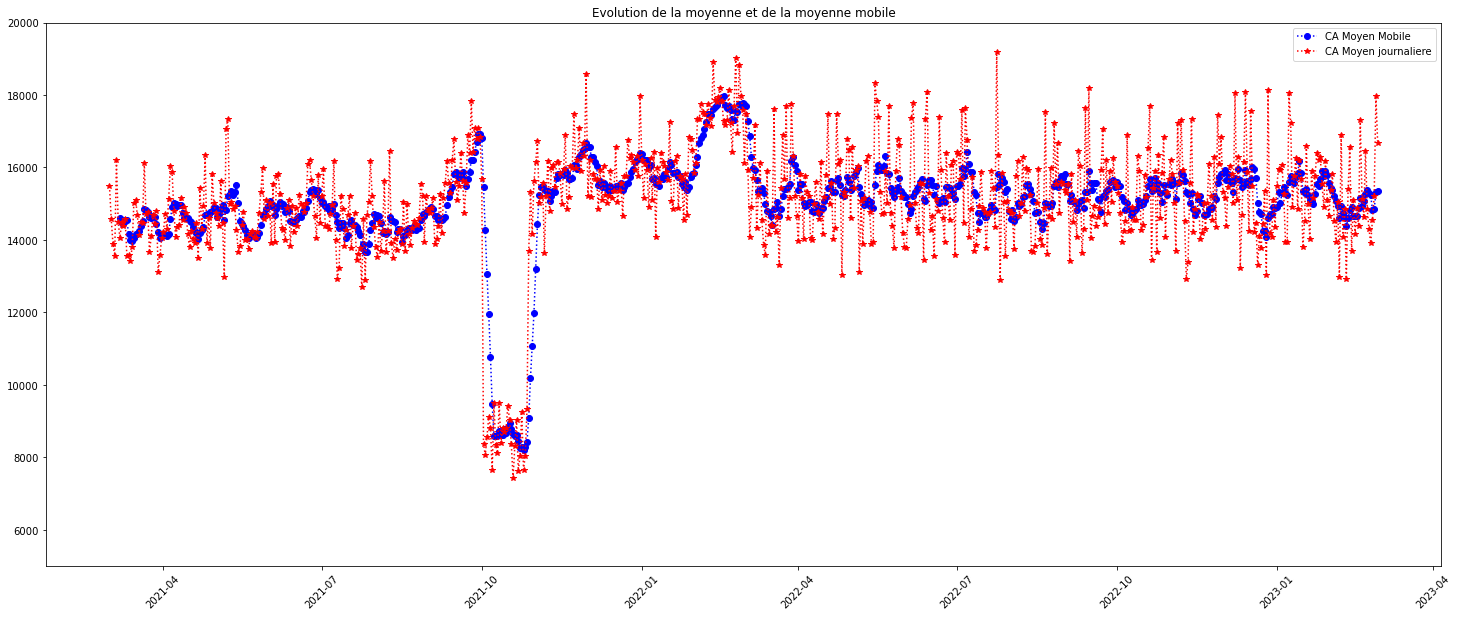

In [23]:
plt.figure(figsize=(25, 10))

plt.plot(my['day'], my['moyenmob'], "b:o", label="CA Moyen Mobile")
plt.plot(my['day'], my['price'], "r:*", label="CA Moyen journaliere")
plt.xticks(rotation=45)

plt.ylim(5000, 20000)

plt.title("Evolution de la moyenne et de la moyenne mobile")
plt.legend()
plt.show()

Text(0.5, 0, 'jours')

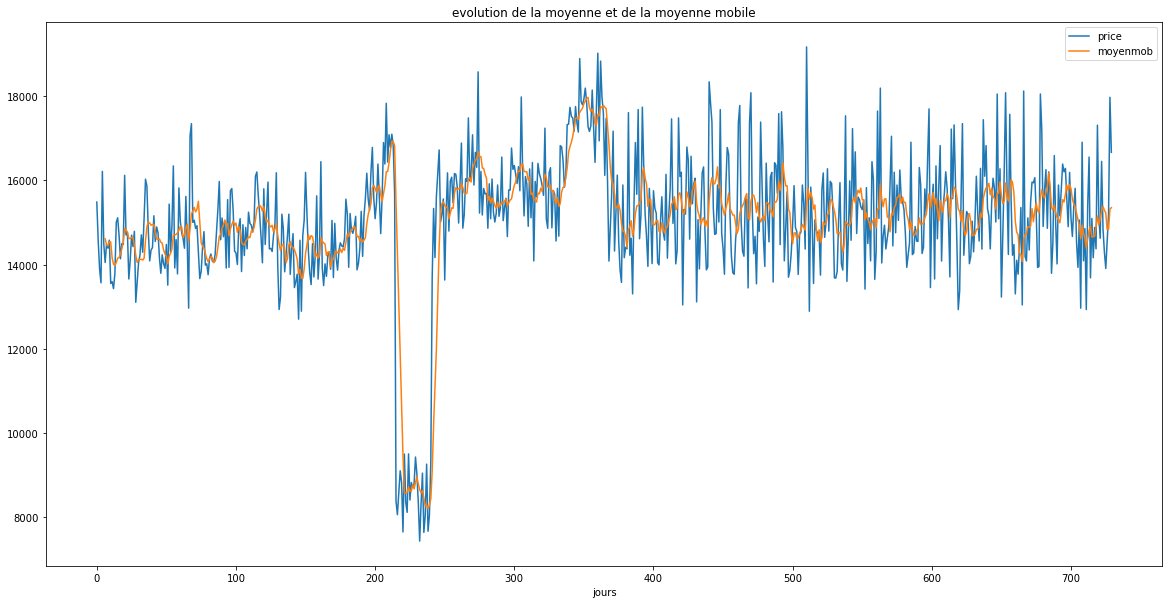

In [24]:
# evolution du chiffre d'affaire ^par jours

my[['price', 'moyenmob']].plot(label='jours',
                                  figsize=(20,10))
plt.title("evolution de la moyenne et de la moyenne mobile")

plt.xlabel('jours')

In [25]:
#Transfert des données du mois d'octobre dans un nouveau dataframe
#customeroc=customers[(customers['day'] >= 2023-10-1 & customers['day'] <= 2023-10-31)] 
#customeroc

customers['year'] =pd.DatetimeIndex(customers['day']).year
customers['month'] =pd.DatetimeIndex(customers['day']).month
customers

,id_prod,date,session_id,client_id,price,categ,sex,birth,day,year,month
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05-20,2022,5
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,2022-02-02,2022,2
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,2021-06-24,2021,6
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,2023-01-11,2023,1
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,8.57,0.0,f,1972,2022-10-20,2022,10
...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951,2022-01-15,2022,1
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977,2022-03-19,2022,3
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988,2022-12-20,2022,12
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986,2021-07-16,2021,7


In [26]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632689 entries, 0 to 679331
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     632689 non-null  object        
 1   date        632689 non-null  object        
 2   session_id  632689 non-null  object        
 3   client_id   632689 non-null  object        
 4   price       632689 non-null  float64       
 5   categ       632689 non-null  float64       
 6   sex         632689 non-null  object        
 7   birth       632689 non-null  int64         
 8   day         632689 non-null  datetime64[ns]
 9   year        632689 non-null  int64         
 10  month       632689 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 57.9+ MB


# moyenne mobile par mois

In [27]:
#moyennemobile par mois
my = customers.filter(items=['month', 'price']).sort_values("month")

my = my.groupby("month").sum().reset_index()

my['moyenmob'] = my['price'].rolling(3).mean()
my.head(10)

,month,price,moyenmob
0,1,970504.037282,NaN
1,2,914726.755923,NaN
2,3,923216.645470,936149.146225
3,4,897055.369790,911666.257061
4,5,934488.919790,918253.645017
5,6,904639.862055,912061.383878
6,7,921319.921602,920149.567816
7,8,915931.171149,913963.651602
8,9,930404.080243,922551.724331
9,10,767840.571149,871391.940847


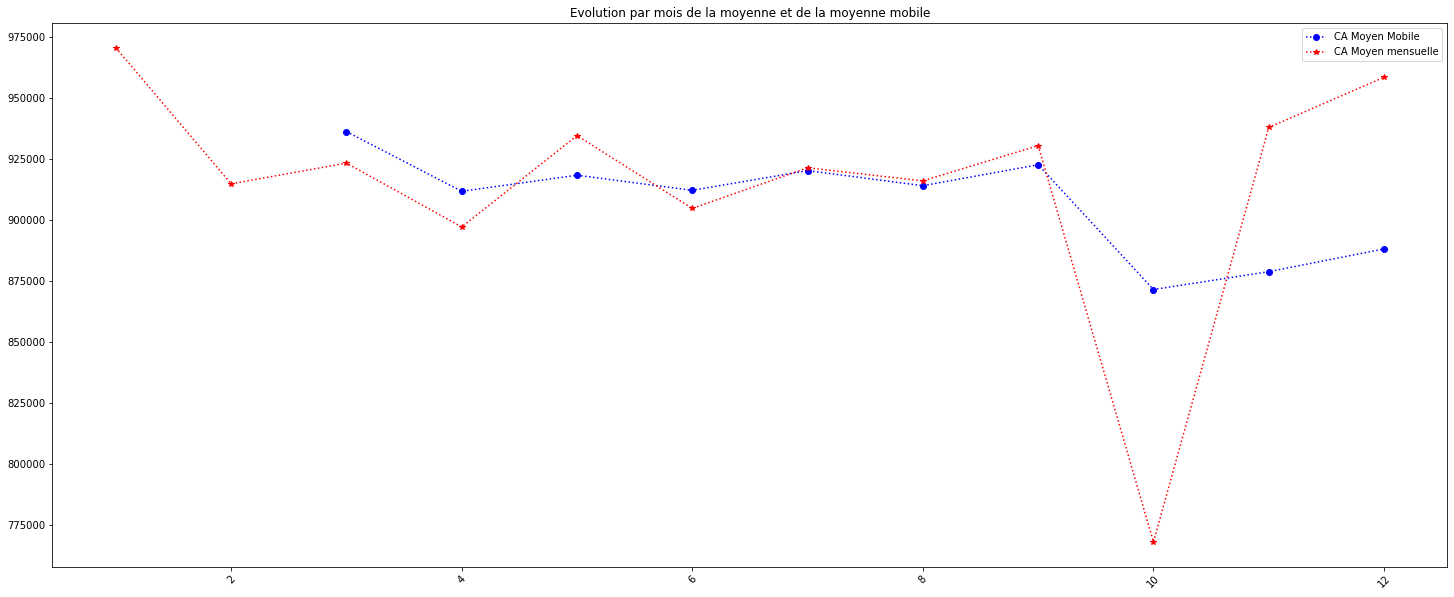

In [28]:
plt.figure(figsize=(25, 10))

plt.plot(my['month'], my['moyenmob'], "b:o", label="CA Moyen Mobile")
plt.plot(my['month'], my['price'], "r:*", label="CA Moyen mensuelle")
plt.xticks(rotation=45)

plt.title("Evolution par mois de la moyenne et de la moyenne mobile")
plt.legend()
plt.show()

# Mettons en évidence le mois d'octobre

In [29]:
#Transfert des données du mois d'octobre dans un nouveau dataframe
#customeroc=customers[(customers['day'] >= 2023-10-1 & customers['day'] <= 2023-10-31)] 
#customeroc

customers['year'] =pd.DatetimeIndex(customers['day']).year
customers['month'] =pd.DatetimeIndex(customers['day']).month
customers

,id_prod,date,session_id,client_id,price,categ,sex,birth,day,year,month
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05-20,2022,5
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,2022-02-02,2022,2
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,2021-06-24,2021,6
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,2023-01-11,2023,1
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,8.57,0.0,f,1972,2022-10-20,2022,10
...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951,2022-01-15,2022,1
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977,2022-03-19,2022,3
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988,2022-12-20,2022,12
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986,2021-07-16,2021,7


In [105]:
cust3=customers[(customers['day']>='2021-10-01') & (customers['day']<='2021-10-31')].groupby(['categ','day']).sum().reset_index()

In [122]:
cust33=pd.pivot_table(cust3, columns=['categ'], index=['day']).reset_index()
cust33

day      age                       birth                     \
categ                 0.0      1.0     2.0        0.0       1.0      2.0   
0     2021-10-01  27084.0  16127.0   941.0  1190762.0  631233.0  69864.0   
1     2021-10-02  26713.0      NaN   891.0  1195179.0       NaN  51707.0   
2     2021-10-03  27096.0      NaN   741.0  1186704.0       NaN  55903.0   
3     2021-10-04  26040.0      NaN   927.0  1125047.0       NaN  67855.0   
4     2021-10-05  26448.0      NaN  1092.0  1138800.0       NaN  73759.0   
5     2021-10-06  28964.0      NaN   678.0  1294078.0       NaN  47874.0   
6     2021-10-07  24919.0      NaN   750.0  1103915.0       NaN  49825.0   
7     2021-10-08  28155.0      NaN  1175.0  1228128.0       NaN  81768.0   
8     2021-10-09  25491.0      NaN   854.0  1123573.0       NaN  59836.0   
9     2021-10-10  24448.0      NaN   722.0  1086179.0       NaN  53899.0   
10    2021-10-11  26971.0      NaN   939.0  1186829.0       NaN  75935.0   
11    2021-10-12  26130.0      NaN   659.0  1187670.0       NaN  53962.0   
12    2021-10-13  26101.0      NaN   910.0  1157354.0       NaN  69895.0   
13    2021-10-14  24960.0      NaN  1049.0  1118035.0       NaN  67733.0   
14    2021-10-15  26333.0      NaN  1051.0  1134869.0       NaN  73800.0   
15    2021-10-16  26115.0      NaN  1115.0  1191731.0       NaN  85874.0   
16    2021-10-17  25567.0      NaN  1136.0  1147773.0       NaN  85853.0   
17    2021-10-18  24557.0      NaN   970.0  1098208.0       NaN  69835.0   
18    2021-10-19  23294.0      NaN   682.0  1046873.0       NaN  55962.0   
19    2021-10-20  22463.0      NaN   962.0   999152.0       NaN  77935.0   
20    2021-10-21  25725.0      NaN  1182.0  1145592.0       NaN  79738.0   
21    2021-10-22  23954.0      NaN   810.0  1056328.0       NaN  57857.0   
22    2021-10-23  22847.0      NaN  1088.0  1014952.0       NaN  81855.0   
23    2021-10-24  24525.0      NaN   984.0  1082056.0       NaN  81959.0   
24    2021-10-25  23176.0      NaN   823.0  1014623.0       NaN  61890.0   
25    2021-10-26  24731.0      NaN   842.0  1100057.0       NaN  57825.0   
26    2021-10-27  22010.0      NaN  1199.0   987467.0       NaN  93882.0   
27    2021-10-28  23380.0  14741.0   681.0  1014419.0  588113.0  51917.0   
28    2021-10-29  24146.0  14735.0  1269.0  1048044.0  604303.0  95835.0   
29    2021-10-30  22384.0  15438.0   867.0  1007323.0  629899.0  65892.0   
30    2021-10-31  23877.0  15741.0   959.0  1058428.0  647803.0  73892.0   

        month                       price                         year  \
categ     0.0     1.0    2.0          0.0      1.0      2.0        0.0   
0      6020.0  3200.0  350.0  6261.110000  6530.99  2898.08  1216642.0   
1      6040.0     NaN  260.0  6453.510000      NaN  1926.99  1220684.0   
2      6000.0     NaN  280.0  6231.860000      NaN  1827.13  1212600.0   
3      5690.0     NaN  340.0  6204.219547      NaN  2363.93  1149949.0   
4      5760.0     NaN  370.0  6181.620000      NaN  2920.56  1164096.0   
5      6540.0     NaN  240.0  7017.920000      NaN  1806.49  1321734.0   
6      5580.0     NaN  250.0  5932.980000      NaN  1715.08  1127718.0   
7      6210.0     NaN  410.0  6552.440000      NaN  2946.05  1255041.0   
8      5680.0     NaN  300.0  6080.920000      NaN  2268.30  1147928.0   
9      5490.0     NaN  270.0  5914.360000      NaN  2199.53  1109529.0   
10     6000.0     NaN  380.0  6570.660000      NaN  2932.21  1212600.0   
11     6000.0     NaN  270.0  6324.240000      NaN  2083.26  1212600.0   
12     5850.0     NaN  350.0  6242.930000      NaN  2579.83  1182285.0   
13     5650.0     NaN  340.0  6039.460000      NaN  2663.67  1141865.0   
14     5740.0     NaN  370.0  6142.944773      NaN  2658.40  1160054.0   
15     6020.0     NaN  430.0  6222.320000      NaN  3206.01  1216642.0   
16     5800.0     NaN  430.0  6007.650000      NaN  3015.77  1172180.0   
17     5550.0     NaN  350.0  5795.060000      NaN  2562.99  1121655.0   
18     5290.0     NaN  2

In [107]:
cust34=cust33[['day','price']]

In [124]:
cust34.columns=['day',0,1,2]
cust34

,day,0,1,2
0,2021-10-01,6261.110000,6530.99,2898.08
1,2021-10-02,6453.510000,NaN,1926.99
2,2021-10-03,6231.860000,NaN,1827.13
3,2021-10-04,6204.219547,NaN,2363.93
4,2021-10-05,6181.620000,NaN,2920.56
5,2021-10-06,7017.920000,NaN,1806.49
6,2021-10-07,5932.980000,NaN,1715.08
7,2021-10-08,6552.440000,NaN,2946.05
8,2021-10-09,6080.920000,NaN,2268.30
9,2021-10-10,5914.360000,NaN,2199.53


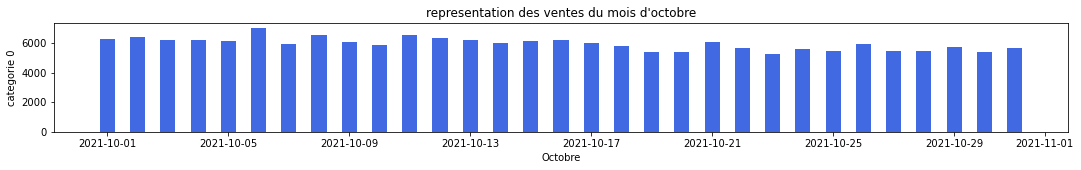

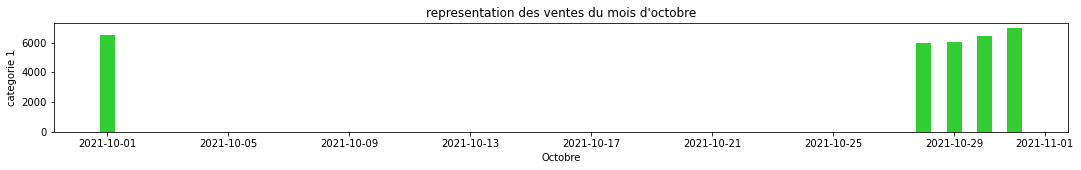

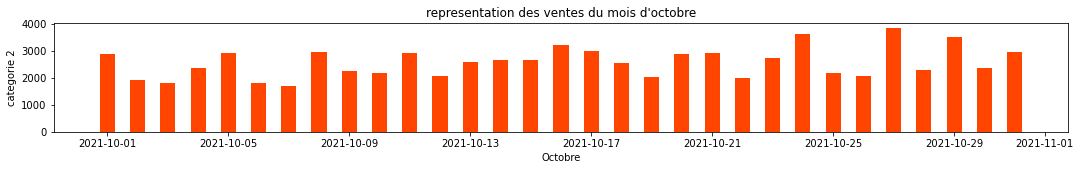

In [126]:


#visualisation des produits vendus par catégories et par jours
for i, categ in enumerate([0,1,2]):
    plt.figure(figsize=(40,2))
    plt.subplot(1,2,2)
    plt.bar(cust34['day'], cust34[categ], width=0.5, color=color[i])
    plt.xlabel("Octobre")
    plt.ylabel(f'categorie {categ}')
    plt.title("representation des ventes du mois d'octobre")
    plt.show()

In [38]:
#chiffre d'affaire en fonction de l'année
customers[['year','price']].groupby('year').sum().reset_index()

,year,price
0,2021,4.415756e+06
1,2022,5.657428e+06
2,2023,9.032143e+05


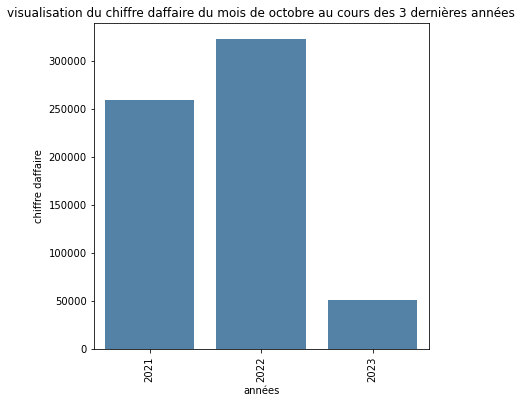

In [39]:
#visualisation


plt.figure(figsize=(6,6))
order = (customers.groupby('year')['price'].sum()).index
sns.countplot(data=customers, x='year', order=order,color='steelblue')
plt.title('visualisation du chiffre daffaire du mois de octobre au cours des 3 dernières années')
plt.xlabel('années')
plt.xticks(rotation = 90)
plt.ylabel('chiffre daffaire')
plt.show()

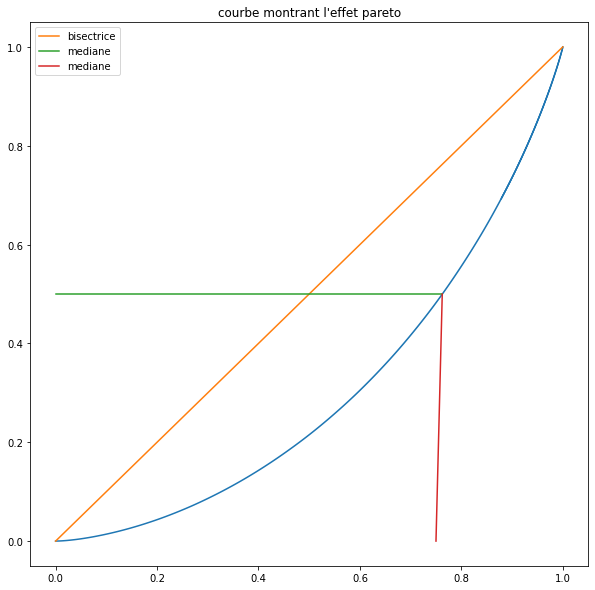

In [40]:
### courbe de lorenz
fig = plt.figure(figsize=(10,10))
custome = (customers.groupby(['client_id'])['price'].sum()).values
n = len(custome)
lorenz = np.cumsum(np.sort(custome)) / custome.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
median= lorenz[lorenz<0.5].size/lorenz.size


xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0.0, 1.0],[0.0,1.0], label="bisectrice")  #Red straight line
plt.plot([0.0,median], [0.5,0.5], label="mediane") # green straight line*
plt.plot([0.75,median], [0.0,0.5], label="mediane") # green straight line
plt.title("courbe montrant l'effet pareto")
plt.legend()
plt.show()


# TOP ET FLOP

In [41]:
#affichons les 10 les produits plus vendus
custop=customers[['id_prod','price']].groupby('id_prod').sum().reset_index()

custop
cu=custop.sort_values('price', ascending=False).iloc[:10]
cu

,id_prod,price
3094,2_159,91097.76
3068,2_135,63470.80
3044,2_112,58785.90
3033,2_102,55650.74
2590,1_369,50834.81
3150,2_209,50742.75
2618,1_395,49949.77
2640,1_414,48803.84
3102,2_166,48308.40
3042,2_110,47870.25


<Figure size 432x432 with 0 Axes>

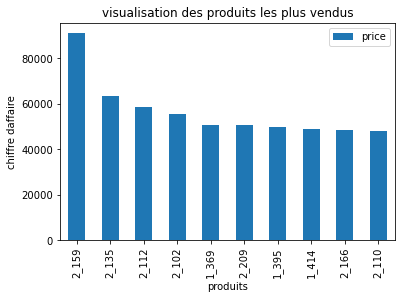

In [42]:
#visualisation des 10 produits les plus vendus
plt.figure(figsize=(6,6))
ax = cu.plot.bar(x='id_prod', y='price', rot=0)
plt.title('visualisation des produits les plus vendus')
plt.xlabel('produits')
plt.xticks(rotation = 90)
plt.ylabel('chiffre daffaire')
plt.show()



In [43]:
#affichons les 10 les produits moins vendus
m=customers.groupby('id_prod')['price'].sum().sort_values(ascending=True).iloc[:10].reset_index()
m

,id_prod,price
0,0_1539,0.99
1,0_1191,0.99
2,0_1284,1.38
3,0_1726,1.57
4,0_1653,1.98
5,0_541,1.99
6,0_807,1.99
7,0_1601,1.99
8,0_1871,1.99
9,0_1728,2.27


<Figure size 432x432 with 0 Axes>

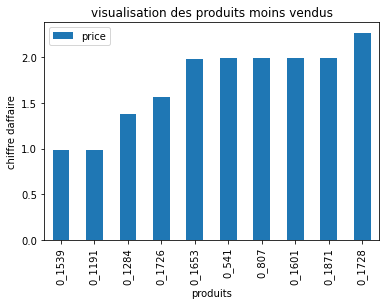

In [44]:
#visualisation des 10 les produits moins vendus
#plt.plot(customers.groupby('id_prod')['price'].sum().sort_values(ascending=True).iloc[:10])
#plt.title("les 10 produits les moins vendus")
#plt.ylabel('prix')
#plt.xlabel('produits')
#plt.show()

plt.figure(figsize=(6,6))
ax = m.plot.bar(x='id_prod', y='price', rot=0)
plt.title('visualisation des produits moins vendus')
plt.xlabel('produits')
plt.xticks(rotation = 90)
plt.ylabel('chiffre daffaire')
plt.show()


In [45]:
customers.groupby('client_id').sum()

,price,categ,birth,year,month
client_id,,,,,
c_1,558.18,10.0,76245,78841,305
c_10,1353.60,42.0,113448,117253,419
c_100,254.85,7.0,15936,16170,56
c_1000,2261.89,82.0,245750,252715,800
c_1001,1812.86,33.0,202164,206205,741
...,...,...,...,...,...
c_995,189.41,3.0,27370,28300,118
c_996,1625.58,55.0,187150,192058,655
c_997,1490.01,51.0,117646,119284,388


In [46]:
# chiffre d'affaire par client
n= customers.groupby('client_id').sum()['price'].sort_values(ascending = False).head(20)
n

client_id
c_3263    5276.870000
c_1570    5271.620000
c_2899    5214.050000
c_2140    5208.820000
c_7319    5155.770000
c_8026    5100.034773
c_7959    5085.450000
c_7421    5050.200000
c_5263    5006.850000
c_1876    5005.529547
c_1422    4993.550000
c_2595    4959.660000
c_2505    4930.550000
c_4491    4927.640000
c_8392    4923.020000
c_880     4897.190000
c_5953    4844.879547
c_1636    4829.470000
c_4840    4826.510000
c_2077    4816.780000
Name: price, dtype: float64

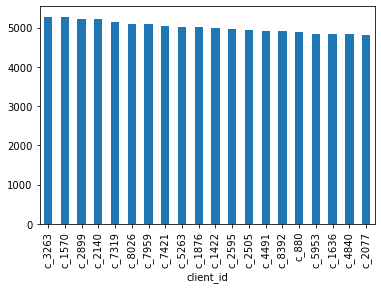

In [47]:
#visualisation du chiffre d'affaire par client

n.plot(kind='bar')


plt.show()

In [48]:
#chiffre d'affaire par mois
customers.groupby('month')['price'].sum().reset_index()

,month,price
0,1,970504.037282
1,2,914726.755923
2,3,923216.645470
3,4,897055.369790
4,5,934488.919790
5,6,904639.862055
6,7,921319.921602
7,8,915931.171149
8,9,930404.080243
9,10,767840.571149


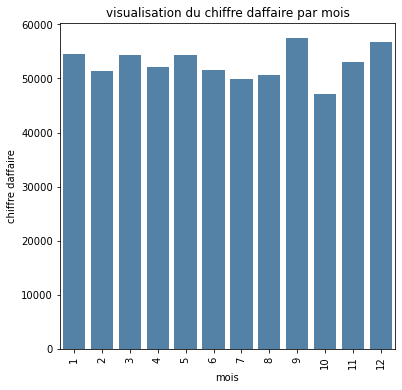

In [49]:
# Barplot (visualisation  )
plt.figure(figsize=(6,6))
order = (customers.groupby('month')['price'].sum()).index
sns.countplot(data=customers, x='month', order=order,color='steelblue')
plt.title('visualisation du chiffre daffaire par mois')
plt.xlabel('mois')
plt.xticks(rotation = 90)
plt.ylabel('chiffre daffaire')
plt.show()

In [50]:
# chiffre d'affaire par année
customers.groupby('year')['price'].sum().reset_index()

,year,price
0,2021,4.415756e+06
1,2022,5.657428e+06
2,2023,9.032143e+05


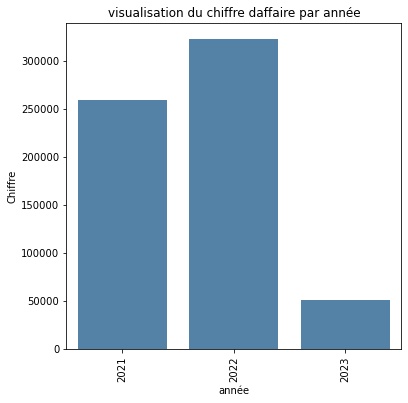

In [51]:
#visualisation

plt.figure(figsize=(6,6))
ca = (customers.groupby(['year'])['price'].sum()).index
sns.countplot(data=customers, x='year', order = ca, color='steelblue')
plt.title('visualisation du chiffre daffaire par année')
plt.xlabel('année')
plt.xticks(rotation = 90)
plt.ylabel('Chiffre')
plt.show()

In [52]:
#chiffre d'affaire par sexe
customers.groupby('sex')['price'].sum().reset_index()

,sex,price
0,f,5.708022e+06
1,m,5.268377e+06


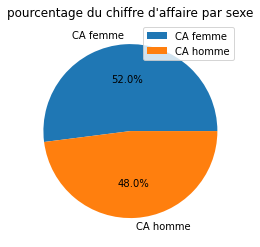

In [53]:
#visualisation 
plt.pie(customers.groupby('sex')['price'].sum(),labels=['CA femme','CA homme'],autopct="%1.1f%%")
plt.title("pourcentage du chiffre d'affaire par sexe")
plt.legend()
plt.show()

In [54]:
#chiffre d'affaire par categorie
customers.groupby(['categ'])['price'].sum().reset_index()

,categ,price
0,0.0,4.122901e+06
1,1.0,4.349433e+06
2,2.0,2.504064e+06


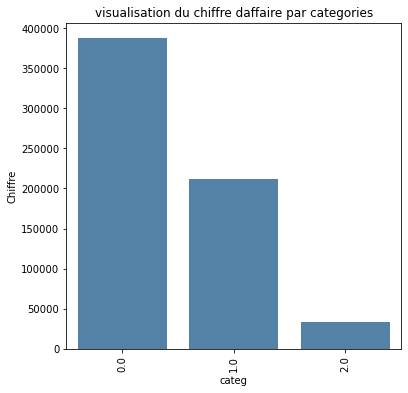

In [55]:
# Barplot (visualisation  )
plt.figure(figsize=(6,6))
ca = (customers.groupby(['categ'])['price'].sum()).index
sns.countplot(data=customers, x='categ', order = ca, color='steelblue')
plt.title('visualisation du chiffre daffaire par categories')
plt.xlabel('categ')
plt.xticks(rotation = 90)
plt.ylabel('Chiffre')
plt.show()

In [56]:
# data avec tranche d'age
customers["age"] =2023- customers['birth']
customers

,id_prod,date,session_id,client_id,price,categ,sex,birth,day,year,month,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05-20,2022,5,37
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,2022-02-02,2022,2,35
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,2021-06-24,2021,6,23
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,2023-01-11,2023,1,43
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,8.57,0.0,f,1972,2022-10-20,2022,10,51
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951,2022-01-15,2022,1,72
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977,2022-03-19,2022,3,46
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988,2022-12-20,2022,12,35
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986,2021-07-16,2021,7,37


In [57]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632689 entries, 0 to 679331
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     632689 non-null  object        
 1   date        632689 non-null  object        
 2   session_id  632689 non-null  object        
 3   client_id   632689 non-null  object        
 4   price       632689 non-null  float64       
 5   categ       632689 non-null  float64       
 6   sex         632689 non-null  object        
 7   birth       632689 non-null  int64         
 8   day         632689 non-null  datetime64[ns]
 9   year        632689 non-null  int64         
 10  month       632689 non-null  int64         
 11  age         632689 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 78.9+ MB


In [58]:
customers.groupby(['categ','age']).sum()[['price']].reset_index()

,categ,age,price
0,0.0,19,35914.360000
1,0.0,20,9560.430000
2,0.0,21,11302.024320
3,0.0,22,10561.990000
4,0.0,23,11972.519547
...,...,...,...
223,2.0,90,49.610000
224,2.0,91,121.920000
225,2.0,92,86.700000
226,2.0,93,111.980000


In [59]:

customers['tranche'] = pd.cut(customers['age'], bins=[15, 25, 35, 45, 55, 65, 75, 100], labels=['16-25', '26-35', '36-45','46-55', '56-65','66-75', '76-100'])
customers

,id_prod,date,session_id,client_id,price,categ,sex,birth,day,year,month,age,tranche
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05-20,2022,5,37,36-45
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,2022-02-02,2022,2,35,26-35
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,2021-06-24,2021,6,23,16-25
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,2023-01-11,2023,1,43,36-45
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,8.57,0.0,f,1972,2022-10-20,2022,10,51,46-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951,2022-01-15,2022,1,72,66-75
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977,2022-03-19,2022,3,46,46-55
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988,2022-12-20,2022,12,35,26-35
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986,2021-07-16,2021,7,37,36-45


In [60]:
A=customers.groupby(['tranche']).agg({'price':'sum','id_prod':'count'}).reset_index()
A

,tranche,price,id_prod
0,16-25,1.718263e+06,42660
1,26-35,2.296691e+06,108076
2,36-45,2.784751e+06,210051
3,46-55,2.016571e+06,143086
4,56-65,1.105726e+06,65935
5,66-75,7.312050e+05,43637
6,76-100,3.231919e+05,19244


In [61]:
A.rename(columns={'id_prod':'nbre_vente'},inplace=True)
A

,tranche,price,nbre_vente
0,16-25,1.718263e+06,42660
1,26-35,2.296691e+06,108076
2,36-45,2.784751e+06,210051
3,46-55,2.016571e+06,143086
4,56-65,1.105726e+06,65935
5,66-75,7.312050e+05,43637
6,76-100,3.231919e+05,19244


In [62]:
A=A.set_index('tranche')
A

,price,nbre_vente
tranche,,
16-25,1.718263e+06,42660
26-35,2.296691e+06,108076
36-45,2.784751e+06,210051
46-55,2.016571e+06,143086
56-65,1.105726e+06,65935
66-75,7.312050e+05,43637
76-100,3.231919e+05,19244


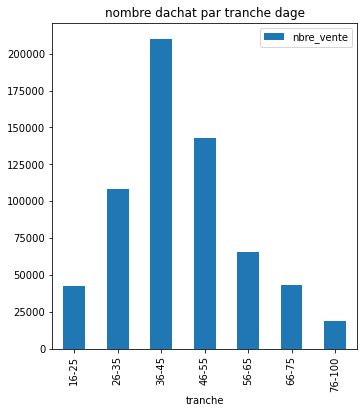

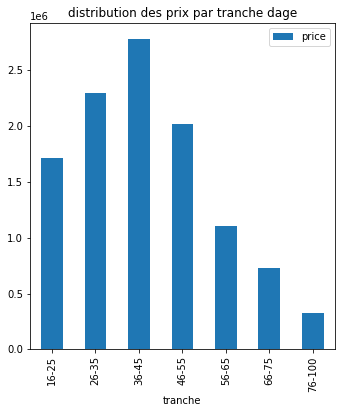

In [63]:
#chiffre d'affaire par âge
customers.groupby(['age']).agg({'price':'sum','id_prod':'count'})
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.title('nombre dachat par tranche dage')
A['nbre_vente'].plot(kind='bar')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title('distribution des prix par tranche dage')
A['price'].plot(kind='bar')
plt.legend()
plt.show()

In [64]:
F = pd.DataFrame(customers.groupby("tranche").sum()['price'])
F

,price
tranche,
16-25,1.718263e+06
26-35,2.296691e+06
36-45,2.784751e+06
46-55,2.016571e+06
56-65,1.105726e+06
66-75,7.312050e+05
76-100,3.231919e+05


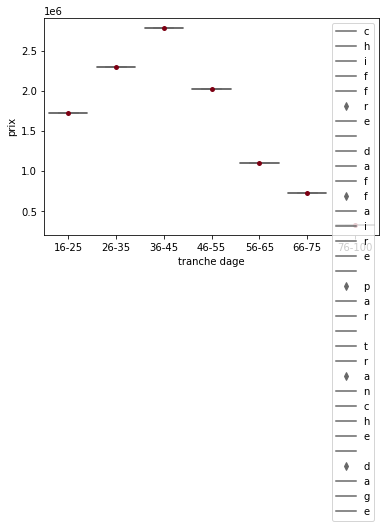

In [65]:
# vente par categorie et par tranche d'age
ax = sns.boxplot(x=F.index, y='price', data=F, color='#99c2a2')
ax = sns.swarmplot(x=F.index, y="price", data=F, color='#7d0013')
plt.xlabel('tranche dage')
plt.ylabel('prix')
plt.legend('chiffre daffaire par tranche dage')
plt.show()

In [66]:
#analyse du genre de client et de la categorie des produits achetées
D=customers.groupby(['sex', 'categ'])['price'].aggregate('sum')
D


sex  categ
f    0.0      2.134696e+06
     1.0      2.285170e+06
     2.0      1.288155e+06
m    0.0      1.988205e+06
     1.0      2.064263e+06
     2.0      1.215909e+06
Name: price, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


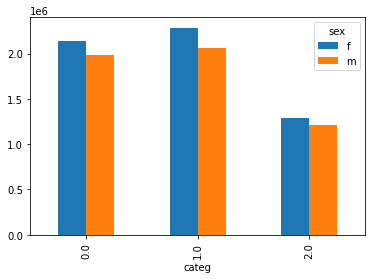

In [67]:
#convertir les données en une table de contingence avec des fréquences
pivot = customers.pivot_table('price', index='categ',
                    columns='sex', aggfunc='sum').plot(kind='bar')
print (pivot)


# Chiffre d'affaire par age et par catégorie

AxesSubplot(0.125,0.125;0.775x0.755)


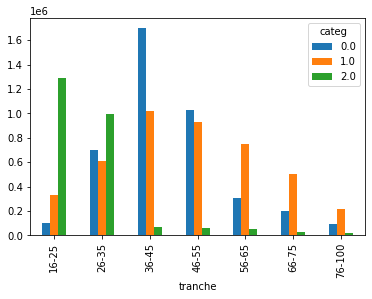

In [68]:
pivot=customers.pivot_table('price', index='tranche',
                    columns='categ', aggfunc='sum').plot(kind='bar')
print(pivot)

In [69]:
customers

,id_prod,date,session_id,client_id,price,categ,sex,birth,day,year,month,age,tranche
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,2022-05-20,2022,5,37,36-45
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,2022-02-02,2022,2,35,26-35
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,2021-06-24,2021,6,23,16-25
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,2023-01-11,2023,1,43,36-45
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,8.57,0.0,f,1972,2022-10-20,2022,10,51,46-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951,2022-01-15,2022,1,72,66-75
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977,2022-03-19,2022,3,46,46-55
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988,2022-12-20,2022,12,35,26-35
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986,2021-07-16,2021,7,37,36-45


In [70]:
customers.to_csv("FINKE_PROJET_4_1.csv")